<a href="https://colab.research.google.com/github/Albert-Sharma/TDS/blob/main/Week5_GA_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: read my xlsx file and load it as dataframe

import pandas as pd
df = pd.read_excel('GOF_24t2_3xlsx.xlsx')


In [2]:
df

,obs
0,4
1,3
2,8
3,7
4,4
...,...
115,5
116,2
117,2
118,7


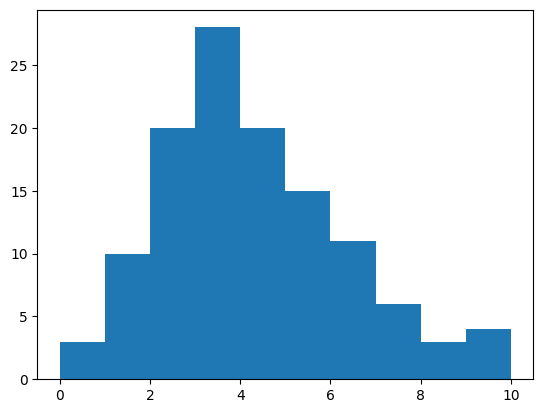

In [3]:
# prompt: Based on the given sample data, the column “obs” can be assumed to have a __
# Discrete distribution or Continuous distribution

# It's difficult to tell without seeing the data in 'GOF_24t2_3xlsx.xlsx'.
# If the 'obs' column contains only whole numbers or a finite set of values, it's likely discrete.
# If it can take any value within a range, it's continuous.

# Assuming it's a continuous distribution, you could plot a histogram to visualize:
import matplotlib.pyplot as plt
plt.hist(df['obs'])
plt.show()


In [6]:
import numpy as np
import scipy.stats as stats

# Summary statistics
summary_stats = df['obs'].describe()
print("Summary Statistics:")
print(summary_stats)

# Calculate the mean
mean_obs = np.mean(df['obs'])
print(f"Mean: {mean_obs:.4f}")

# Calculate the standard deviation
std_obs = np.std(df['obs'], ddof=1)  # Sample standard deviation
print(f"Standard Deviation: {std_obs:.4f}")

# Frequency of each defect count
frequency = df['obs'].value_counts().sort_index()
print("Frequency of each defect count:")
print(frequency)

# Expected frequency based on Poisson distribution
lambda_ = mean_obs  # Poisson distribution parameter
expected_freq = [stats.poisson.pmf(k, lambda_) * 100 for k in range(max(df['obs']) + 1)]
expected_freq = np.round(expected_freq, 4)
print("Expected Frequency based on Poisson distribution:")
for i, freq in enumerate(expected_freq):
    print(f"{i}: {freq}")



Summary Statistics:
count    120.000000
mean       3.841667
std        2.145920
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: obs, dtype: float64
Mean: 3.8417
Standard Deviation: 2.1459
Frequency of each defect count:
obs
0      3
1     10
2     20
3     28
4     20
5     15
6     11
7      6
8      3
10     4
Name: count, dtype: int64
Expected Frequency based on Poisson distribution:
0: 2.1458
1: 8.2434
2: 15.8341
3: 20.2765
4: 19.4739
5: 14.9624
6: 9.5801
7: 5.2577
8: 2.5248
9: 1.0777
10: 0.414


In [7]:
mean_obs = df['obs'].mean()
print(f"Expected number of scratches (Mean): {mean_obs:.4f}")

Expected number of scratches (Mean): 3.8417


In [8]:
mean_obs = np.mean(df)
median_obs = np.median(df)
mode_obs = stats.mode(df)[0][0]

mean_obs, median_obs, mode_obs

(3.841666666666667, 3.0, 3)

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare, poisson

# Calculate observed frequencies
obs_freq = df['obs'].value_counts().sort_index()

# Calculate mean (λ) for Poisson distribution
mean_obs = df['obs'].mean()

# Calculate expected frequencies using Poisson distribution
expected_freq = [poisson.pmf(k, mean_obs) * len(df) for k in obs_freq.index]

# Adjust expected frequencies to match total number of observations
expected_freq = expected_freq / np.sum(expected_freq) * np.sum(obs_freq)

# Perform chi-square goodness of fit test
chi2_stat, p_val = chisquare(obs_freq, f_exp=expected_freq)

# Calculate the probability of observing exactly 3 defects
prob_5_defects = poisson.pmf(3, mean_obs)

# print(f"Chi-square Statistic: {chi2_stat:.4f}")
# print(f"p-value: {p_val:.4f}")
print(f"Probability of observing exactly 5 defects: {prob_5_defects:.4f}")

Probability of observing exactly 5 defects: 0.2028


In [10]:
# Step 1: Calculate the mean (X)
lambda_ = df['obs'].mean()

# Step 2: Calculate observed and expected frequencies
max_obs = df['obs'].max()
observed_freq = df['obs'].value_counts().sort_index()
expected_freq = [poisson.pmf(k, lambda_) * len(df) for k in range(max_obs + 1)]

# Ensure observed_freq has all categories from 0 to max_obs
obs_freq = [observed_freq.get(i, 0) for i in range(max_obs + 1)]

# Adjust expected frequencies to ensure the sum matches the observed frequencies by modifying the last bin total observed = sum(obs_freq)
total_observed = sum(obs_freq)
total_expected = sum(expected_freq)
if total_observed != total_expected:
  expected_freq[-1] += total_observed - total_expected

# Step 5: Perform the chi-square goodness of fit test
chi2, p_value = stats.chisquare (obs_freq, f_exp = expected_freq)

# Print results
print (f"Chi-square statistic: {chi2:.4f}")
print (f"p-value: {p_value:.4f}")

Chi-square statistic: 17.1087
p-value: 0.0720


In [11]:
obs_freq = df['obs'].value_counts().sort_index()
obs_freq

obs
0      3
1     10
2     20
3     28
4     20
5     15
6     11
7      6
8      3
10     4
Name: count, dtype: int64

In [12]:
data = pd.read_csv('iitm_onlineDegree.csv')
data.head()

,Gender,Preference
0,Female,Business
1,Female,Programming
2,Male,Business
3,Female,Statistics
4,Female,Programming


In [13]:
data.shape

(732, 2)

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Display the first few rows to verify the data
print(data.head())

# Create a contingency table
contingency_table = pd.crosstab(data['Gender'], data['Preference'])

print("\nContingency Table:")
print(contingency_table)

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nResults of Chi-squared test:")
print(f"Chi-squared: {chi2:.4f}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected frequencies table:")
print(expected)

   Gender   Preference
0  Female     Business
1  Female  Programming
2    Male     Business
3  Female   Statistics
4  Female  Programming

Contingency Table:
Preference  Business  Programming  Statistics
Gender                                       
Female           175           58         200
Male             139           36         124

Results of Chi-squared test:
Chi-squared: 2.6627
P-value: 0.26412588203358844
Degrees of Freedom: 2

Expected frequencies table:
[[185.74043716  55.60382514 191.6557377 ]
 [128.25956284  38.39617486 132.3442623 ]]


In [16]:
# prompt: What is the tabulated value of Chi square statistic? if statistics chi square is 2.6627

# Assuming a significance level of 0.05 and degrees of freedom calculated earlier
alpha = 0.05
# Replace dof with the actual degrees of freedom from your chi2_contingency result
dof = 1
critical_value = stats.chi2.ppf(1 - alpha, df=dof)
print(f"Critical Value for Chi-square (α=0.05, df={dof}): {critical_value:.4f}")


Critical Value for Chi-square (α=0.05, df=1): 3.8415
